In [1]:
# from keras import layers
# from keras import models
# from keras import optimizers
# from keras.models import load_model
# from keras.preprocessing.image import ImageDataGenerator
# import matplotlib.pyplot as plt
# from keras.preprocessing import image
# import os,shutil
# from keras.applications import VGG16
# import numpy as np
# import keras


# ### LOADING DATAS


# from keras.datasets import cifar100

# (x_train, y_train), (x_test, y_test) = cifar100.load_data()

# train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')

# test_datagen = ImageDataGenerator(rescale=1./255)

# batch_size = 20

# train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size, shuffle=True)
# test_generator = test_datagen.flow(x_test, y_test, batch_size=batch_size, shuffle=False)

# ### LOADING VGG16

# conv_base = VGG16(weights='imagenet',
#             include_top=False,
#             input_shape=(32,32,3))

# for layer in conv_base.layers:
#     layer.trainable=False

# conv_base.summary()

# ### ADDING CLASSIFIER
# model=models.Sequential()

# model.add(conv_base)
# model.add(layers.Flatten())
# model.add(layers.Dense(256,activation='relu'))
# model.add(layers.Dense(100, activation='softmax'))

# model.summary()

# ### TRAINING AND TESTING
# model.compile(loss='sparse_categorical_crossentropy',
#             optimizer=optimizers.RMSprop(learning_rate=1e-5),
#             metrics=['acc'])

# history = model.fit(
#         train_generator,
#         steps_per_epoch=100,
#         epochs=30,
#         validation_data=test_generator,
#         validation_steps=50)

from keras import layers
from keras import models
from keras.optimizers import Adam
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing import image
import os,shutil
from keras.applications import VGG16
import numpy as np
import keras


### LOADING DATAS


from keras.datasets import cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 64

train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size, shuffle=True)
test_generator = test_datagen.flow(x_test, y_test, batch_size=batch_size, shuffle=False)

### LOADING VGG16

conv_base = VGG16(weights='imagenet',
            include_top=False,
            input_shape=(32,32,3))

for layer in conv_base.layers[:-4]:
    layer.trainable=False

conv_base.summary()

### ADDING CLASSIFIER
model=models.Sequential()

model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='softmax'))

model.summary()

### TRAINING AND TESTING
model.compile(loss='sparse_categorical_crossentropy',
            optimizer=Adam(lr=0.0001),
            metrics=['acc'])

history = model.fit(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=test_generator,
        validation_steps=50)


58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
100/100 [==============================] - 15s 51ms/step - loss: 4.6199 - acc: 0.0072 - val_loss: 4.5365 - val_acc: 0.0012
Epoch 2/100
100/100 [==============================] - 5s 48ms/step - loss: 4.5080 - acc: 0.0230 - val_loss: 4.2696 - val_acc: 0.0219
Epoch 3/100
100/100 [==============================] - 5s 50ms/step - loss: 4.3447 - acc: 0.0267 - val_loss: 4.1060 - val_acc: 0.0297
Epoch 4/100
100/100 [==============================] - 5s 51ms/step - loss: 4.1927 - acc: 0.0162 - val_loss: 3.9270 - val_acc: 0.0731
Epoch 5/100
100/100 [==============================] - 5s 47ms/step - loss: 4.0764 - acc: 0.0169 - val_loss: 3.7272 - val_acc: 0.0344
Epoch 6/100
100/100 [==============================] - 6s 58ms/step - loss: 3.9815 - acc: 0.0127 - val_loss: 3.5892 - val_acc: 0.0203
Epoch 7/100
100/100 [==============================] - 5s 47ms/step - loss: 3.8731 - acc: 0.0127 - val_loss: 3.4729 - val_acc: 0.0128
Epoch 8/100
100/100 [==============================] - 6s 57m

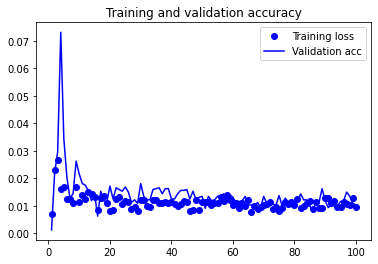

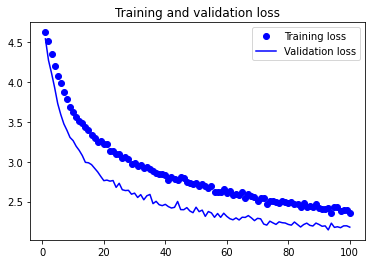

In [2]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs,acc,'bo',label='Training loss')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [3]:
test_loss,test_acc = model.evaluate(test_generator,steps=50)
print('Test accuracy :', test_acc)

50/50 [==============================] - 1s 17ms/step - loss: 2.1808 - acc: 0.0103
Test accuracy : 0.010312500409781933
